# Lending Club Case Study

## <a id = 'top'>About LendingClub</a> [\[1\]](#ref1)

**LendingClub** is a financial services company headquartered in San Francisco, California. It was the **first peer-to-peer (P2P) lender** to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market.

- LendingClub enabled borrowers to create **unsecured personal loans** between $\$$1,000 and $\$$40,000. 
- The standard loan period was **three years**. 
- Investors were able to search and browse the loan listings on LendingClub website and select loans that they wanted to invest in based on the information supplied about the **borrower**, **amount of loan**, **loan grade**, and **loan purpose**. 
- Investors made money from the **interest** on these loans. 
- LendingClub made money by charging borrowers an origination fee and investors a service fee.

## <a id = 'top1'>Outline</a>

1. [General Information](#general-information)
    1. [Importing Required Libraries](#step1)
    2. [Understanding the Loan Dataset](#step2)
    3. [Analysing Columns with All Missing Values](#step3)
    4. [Analysing the Column data types](#step4)
    5. [Analysing the TARGET variable](#step5)
    6. [Getting rid of all the 'Current' rows](#step6)
    7. [Loan Status Breakdown](#step7)
    
2. [Data Cleaning and Manipulation](#data-cleaning-and-manipulation)
    1. [Dropping all the columns with all-null values](#step8)
    2. [Dropping all the single-valued columns](#step9)
    3. [Dropping all columns with entirely unique values, except for one.](#step10)
    4. [Dropping all sparsely populated columns](#step11)
    5. [Dropping all irrelevant columns that are derived post-approval](#step12)
    6. [Imputing missing values in a Categorical variable](#step13)
    7. [Imputing missing values in a Numerical variable with discrete values](#step14)
    8. [Correcting the data type of numerical columns that have '%' symbols](#step15)
    9. [Imputing missing values in a Numerical variable with continuous values](#step16)
    10. [Final Check for Missing Values](#step17)
    11. [Date Conversions](#step18)
    12. [Deriving new Columns using Derived Metrics](#step19)
    13. [Data Summary Statistics](#step20)
    14. [Handling Outliers](#step21)

3. [Univariate Analysis](#univariate-analysis)
    1. [Numerical Variables](#numerical-variables)
        1. [Univariate Analysis of Loan Amounts](#step22)
        2. [Function Definition for Visualization of Numerical Variables](#step23)
        3. [Univariate Analysis of Interest Rates](#step24)
        4. [Univariate Analysis of Annual Incomes](#step25)
        5. [Univariate Analysis of Debt-to-Income Ratio (DTI)](#step26)
        6. [Univariate Analysis of Revolving Line Utilization Rate](#step27)
        7. [Univariate Analysis of Inquiries in past 6 months](#step28)
        8. [Univariate Analysis of Open Credit lines](#step29)
        9. [Univariate Analysis of Borrower's Total number of Credit lines](#step30)
        10. [Univariate Analysis of Total Principal Amount received](#step31)
    2. [Categorical Variables](#categorical-variables)
        1. [Function Definition for Visualization of Categorical Variables](#step32)
        2. [Univariate Analysis of Loan Attribute: Term](#step33)
        2. [Univariate Analysis of Loan Attribute: Loan Grade](#step34)
        3. [Univariate Analysis of Income Attribute: Income Category](#step35)
        4. [Univariate Analysis of Income Attribute: Verification Status](#step36)
        5. [Univariate Analysis of Geographical Attributes: Home Ownership](#step37)
        6. [Univariate Analysis of Geographical Attributes: Region](#step38)
        7. [Univariate Analysis of Employment Length](#step39)
        8. [Univariate Analysis of Loan Purposes](#step40)
      

### _<a id='ref'>References</a>_

<a id='ref1'>1.</a> [Wikipedia Page: LendingClub](https://en.wikipedia.org/wiki/LendingClub)

<a id='ref2'>2.</a> [United States Regions](https://education.nationalgeographic.org/resource/united-states-regions/)

<a id='ref3'>3.</a> [List of U.S. States with Codes and Abbreviations](https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971)

<a id='ref4'>4.</a> [List of regions of the United States](https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States)

## <a id = 'general-information'>1. General Information</a>

#### _<a id = 'step1'><font color = 'RebeccaPurple'>Importing Required Libraries</font></a>_ [▲](#top)

In [1]:
# Import the libraries that we are going to use for our data analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats

# Suppress any unnecessary warning that may appear.
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [2]:
# To display maximum rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

#### _<a id = 'step2'><font color = 'RebeccaPurple'>Understanding the Loan Dataset</font></a>_ [▲](#top)

In [3]:
# Load the Dataset
loan_df0 = pd.read_csv('data/loan.csv', low_memory=False)

# First five rows of the dataset
loan_df0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Number of rows and Columns
rows, cols = loan_df0.shape
print(f'The Loan Dataset has {rows} rows and {cols} columns.')

The Loan Dataset has 39717 rows and 111 columns.


> The Loan Dataset has **39717 rows** and **111 columns**.

#### _<a id = 'step3'><font color = 'RebeccaPurple'>Analysing Columns with All Missing Values</font></a>_ [▲](#top)

In [5]:
# Information on the Missing Values in the Columns
loan_df0.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

> We can see that there are a lot of columns with **ZERO Non-Null** Values.
> And, we must get rid of i.e. **drop** these columns.

In [6]:
# Columns with All Missing Values
loan_df0.columns[loan_df0.isna().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [7]:
null_cols = loan_df0.columns[loan_df0.isna().all()].shape[0]
print(f'The Loan Dataset has {null_cols} cols that have ALL NULL VALUES.')

The Loan Dataset has 54 cols that have ALL NULL VALUES.


> The Loan Dataset has **54 columns** that have **ALL NULL** values.

#### _<a id = 'step4'><font color = 'RebeccaPurple'>Analysing the Column data types</font></a>_ [▲](#top)

In [8]:
# Number of numerical and categorical variables
numerical = loan_df0.select_dtypes(include=np.number).shape[1]
categorical = loan_df0.select_dtypes(exclude=np.number).shape[1]

print(f'There are {numerical} numerical variables and {categorical} categorical variables.')

There are 87 numerical variables and 24 categorical variables.


> There are **87 numerical** variables and **24 categorical** variables **including** the columns with all null values.

In [9]:
# Number of numerical and categorical non-null variables 
numerical = loan_df0[loan_df0.columns[~loan_df0.isnull().all()]].select_dtypes(include=np.number).shape[1]
categorical = loan_df0[loan_df0.columns[~loan_df0.isnull().all()]].select_dtypes(exclude=np.number).shape[1]

print(f'There are {numerical} numerical variables and {categorical} categorical variables.')

There are 33 numerical variables and 24 categorical variables.


> There are **33 numerical** variables and **24 categorical** variables **excluding** the columns with all null values.

 #### _<a id = 'step5'><font color = 'RebeccaPurple'>Analysing the TARGET variable</font></a>_ [▲](#top)

Target Variable is the **loan_status**, which is the key identifier about the status of the accepted loans by the company.

In [10]:
# Information on the Missing Values in loan_status
loan_df0['loan_status'].isnull().sum()

0

> The target variable has **no null values**

In [11]:
# Analyse the Values of the Target Variable
loan_df0['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

> The loan_status has 3 Unique Values: **Fully Paid**, **Charged Off** and **Current**

> If the loan_status is **'Fully Paid'**, then the loan can be classified as a **'GOOD LOAN'**.

> But, if the loan_status is **'Charged Off'**, then the loan can be classified as a **'BAD LOAN'**.

> However, if the loan_status is **'Current'**, then the loan **cannot be classified** in either of the above categories. So it is better to drop all the rows where the Loan status is 'Current'.

#### _<a id = 'step6'><font color = 'RebeccaPurple'>Getting rid of all the 'Current' rows</font></a>_ [▲](#top)

In [12]:
# Missing Data Check - Before
# Output: 54, 57
# print('Before Drop:', len(loan_df0.columns[loan_df0.isna().all()]))
# print('After Drop:', len(loan_df0.dropna(axis='columns', how="all").columns))

In [13]:
# Slicing the required rows
loan = loan_df0[loan_df0['loan_status'] != "Current"]
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [14]:
# Missing Data Check - After
# Output: 55, 56
# print('Before Drop:', len(loan.columns[loan.isna().all()]))
# print('After Drop:', len(loan.dropna(axis='columns', how="all").columns))

In [15]:
# Checking for any duplicate rows in the dataset
duplicate_rows = loan.duplicated().sum()
print("Duplicate Rows: ", duplicate_rows)

Duplicate Rows:  0


> Since there are **NO Duplicate Rows** in the dataset, we don't need to drop any rows.

#### _<a id = 'step7'><font color = 'RebeccaPurple'>Loan Status Breakdown</font></a>_ [▲](#top)

In [16]:
# Filtered Target Data for Visualisation
target = loan['loan_status'].value_counts()[['Fully Paid', 'Charged Off']] 

target

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

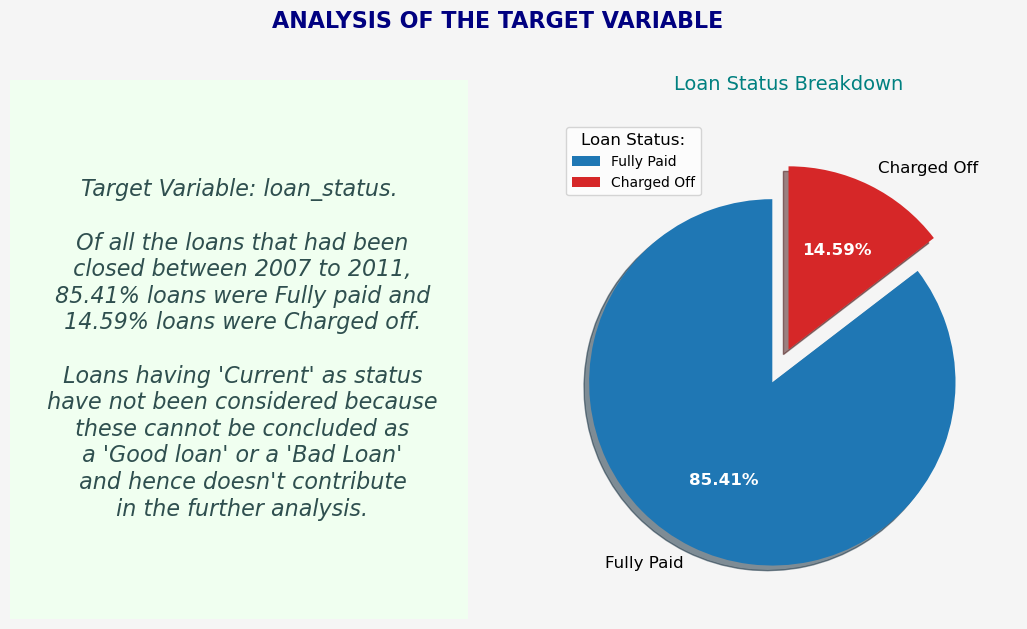

In [17]:
# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 7))

# Formatting Figure
fig.suptitle('ANALYSIS OF THE TARGET VARIABLE\n', fontsize=16, fontweight='bold', color='navy')
fig.patch.set_facecolor('whitesmoke')  # Background color for the figure

# Inference Text
paid, defaulted = round((target/target.sum()*100), 2)
inference = f'Target Variable: loan_status.\n\n \
Of all the loans that had been\n closed between 2007 to 2011,\n \
{paid}% loans were Fully paid and\n {defaulted}% loans were Charged off.\n\n \
Loans having \'Current\' as status\n have not been considered because\n these cannot be concluded as\n \
a \'Good loan\' or a \'Bad Loan\'\n and hence doesn\'t contribute\n in the further analysis.'
ax1.text(0.5, 0.5, inference, ha='center', va='center', fontsize=16, fontstyle='italic', color='darkslategray')
ax1.axis('off')
ax1.add_patch(plt.Rectangle((0, 0), 1, 1, color='honeydew', transform=ax1.transAxes, zorder=-1))

# Plotting Graph
pie_labels = target.index
pie_colors = ['tab:blue', 'tab:red']
wedges, texts, autotexts = ax2.pie(target.values, explode=[0.2,0], labels=pie_labels, colors=pie_colors, autopct='%.2f%%', startangle=90, shadow = True, textprops={'fontsize': 12})
plt.setp(autotexts, color='white', weight="bold")

ax2.set_title('Loan Status Breakdown\n', fontsize=14, color='teal')
ax2.legend(title = 'Loan Status:', fontsize=10, title_fontsize=12, loc='upper left')

plt.show()

## <a id = 'data-cleaning-and-manipulation'>2. Data Cleaning and Manipulation</a>

#### _<a id = 'step8'><font color = 'RebeccaPurple'>Dropping all the columns with all-null values</font></a>_ [▲](#top1)

In [18]:
# Number of columns with all Null values
print("Total columns with values NA: ", len(loan.columns[loan.isna().all()]))

Total columns with values NA:  55


In [19]:
# Drop the columns with all Null values
loan.dropna(axis='columns', how="all", inplace=True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [20]:
# Number of rows and Columns
rows, cols = loan.shape
print(f'The Loan Dataset has {rows} rows and {cols} columns.')

The Loan Dataset has 38577 rows and 56 columns.


> The Loan Dataset now has **38577 rows** and **56 columns**. That is we dropped a total of 55 columns having all null values.

#### _<a id = 'step9'><font color = 'RebeccaPurple'>Dropping all the single-valued columns</font></a>_ [▲](#top1)

In [21]:
# Check no. of unique values in each column
loan.nunique(dropna=True)

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
desc                          25802
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths              

> 11 columns have **ONLY ONE** unique values. These columns are not relevant for any further analysis. So we can drop these columns

> However for some columns all the values are unique. These are usually ids that serve as index. But one such row should be sufficient in the dataset and the rest can be dropped.

In [22]:
# Drop the columns with only one unique value
columns_to_drop = [col for col in loan.columns if loan[col].nunique() == 1]
loan.drop(columns=columns_to_drop, inplace=True)

In [23]:
loan.shape

(38577, 45)

#### _<a id = 'step10'><font color = 'RebeccaPurple'>Dropping all columns with entirely unique values, except for one</font></a>_ [▲](#top1)

In [24]:
# Finding columns with all unique values
columns_to_drop = [col for col in loan.columns if loan[col].nunique() == loan.shape[0]]
columns_to_drop

['id', 'member_id', 'url']

In [25]:
# Dropping 'id' and 'url' because they have lesser utility than 'member_id' in analysis
columns_to_drop.remove('member_id')
loan.drop(columns=columns_to_drop, inplace=True)
loan.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [26]:
loan.shape

(38577, 43)

#### _<a id = 'step11'><font color = 'RebeccaPurple'>Dropping all sparsely populated columns</font></a>_ [▲](#top1)

In [27]:
# Finding the percentage of Missing Values in each Column
null_cols_count = loan.isnull().sum()
null_cols_percent = round(null_cols_count/loan.shape[0]*100, 2)
null_cols_percent = null_cols_percent[null_cols_percent!=0]
null_cols_percent.sort_values(ascending=False) # Prints only those columns that have any Missing Values

mths_since_last_record    92.90
mths_since_last_delinq    64.56
desc                      32.48
emp_title                  6.19
emp_length                 2.68
pub_rec_bankruptcies       1.81
last_pymnt_d               0.18
revol_util                 0.13
title                      0.03
last_credit_pull_d         0.01
dtype: float64

> Two columns: **mths_since_last_record**, and **mths_since_last_delinq** have **more than 60% of empty records**. These cannot be imputed so we must drop these columns.

In [28]:
# Drop the columns with very high percentage of null values
columns_to_drop = ['mths_since_last_record', 'mths_since_last_delinq']
loan.drop(columns=columns_to_drop, inplace=True)

In [29]:
# Checking the percentage of Missing Values in each Column
null_cols_count = loan.isnull().sum()
null_cols_percent = round(null_cols_count/loan.shape[0]*100, 2)
null_cols_percent = null_cols_percent[null_cols_percent!=0]
null_cols_percent.sort_values(ascending=False) # Prints only those columns that have any Missing Values

desc                    32.48
emp_title                6.19
emp_length               2.68
pub_rec_bankruptcies     1.81
last_pymnt_d             0.18
revol_util               0.13
title                    0.03
last_credit_pull_d       0.01
dtype: float64

In [30]:
loan.shape

(38577, 41)

#### _<a id = 'step12'><font color = 'RebeccaPurple'>Dropping all irrelevant columns that are derived post-approval</font></a>_ [▲](#top1)

In [31]:
# Loading the data dictionary
data_dict = pd.read_excel('data/Data_Dictionary.xlsx', sheet_name='LoanStats', index_col='LoanStatNew')
data_dict.head(3)

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower i...
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan...


In [32]:
pd.set_option('display.max_colwidth', None)

In [33]:
# Descriptions of the remaining columns in the loan dataset
data_dict.loc[loan.columns]

,Description
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*


In [34]:
pd.reset_option('display.max_colwidth', 0)

> By the virtue of the **nature** of the column, the following columns are not useful for analysis, because they are determined after the approval (**post-approval**) of the loan. However, it is to be noted that we need to **find the driving factors before the approval (pre-approval) of the loan** that leads to default.

    'installment', 'emp_title', 'desc', 'title', 'zip_code', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'

In [35]:
# Drop the Post-Approval columns 
columns_to_drop = ['installment','emp_title', 'desc', 'title', 'zip_code', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 
                   'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 
                   'last_credit_pull_d']
loan.drop(columns=columns_to_drop, inplace=True)

In [36]:
# Checking the percentage of Missing Values in each Column
null_cols_count = loan.isnull().sum()
null_cols_percent = round(null_cols_count/loan.shape[0]*100, 2)
null_cols_percent = null_cols_percent[null_cols_percent!=0]
null_cols_percent.sort_values(ascending=False) # Prints only those columns that have any Missing Values

emp_length              2.68
pub_rec_bankruptcies    1.81
revol_util              0.13
dtype: float64

> For the three columns: **emp_length**, **pub_rec_bankruptcies**, **revol_util**; the percentage of missing data is low (**less than 5%** of the sample size). Hence, these variables are eligible for **Imputation**.

In [37]:
# Number of rows and Columns
rows, cols = loan.shape
print(f'The Loan Dataset has {rows} rows and {cols} columns.')

The Loan Dataset has 38577 rows and 27 columns.


> The Loan Dataset now has **38577 rows** and **27 columns**. That is we dropped a total of 55 columns having all null values.

 #### _<a id = 'step13'><font color = 'RebeccaPurple'>Imputing missing values in a Categorical variable</font></a>_ [▲](#top1)

In [38]:
# Analysing emp_length
loan['emp_length'].value_counts(dropna=False)

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
NaN          1033
Name: count, dtype: int64

> **Emp_Length is a Categorical Data**, but it should have been a numerical data. Numerical data is more effective in statistical analysis as compared to categorical values.

> Mode = '10+ years'. Hence we will impute Emp_Length with '10+ years'.

In [39]:
# Imputing emp_length
loan['emp_length'].fillna('10+ years', inplace=True)

In [40]:
# emp_length_labels = sorted(loan['emp_length'].unique())
emp_length_labels = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years',  '10+ years']

In [41]:
# Converting emp_length to integer values
loan['emp_length'] = loan['emp_length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, 
                                                 '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, 
                                                 '8 years': 8, '9 years': 9,  '10+ years': 10})

In [42]:
loan['emp_length'].value_counts(dropna=False) # All issues resolved.

emp_length
10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [43]:
# Analysing home_ownership
loan['home_ownership'].value_counts(dropna=False)

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [44]:
# Imputing home_ownership
loan['home_ownership'] = loan['home_ownership'].replace('NONE', 'OTHER')

In [45]:
loan['home_ownership'].value_counts(dropna=False)

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

 #### _<a id = 'step14'><font color = 'RebeccaPurple'>Imputing missing values in a Numerical variable with discrete values</font></a>_ [▲](#top1)

In [46]:
# Analysing pub_rec_bankruptcies
loan['pub_rec_bankruptcies'].value_counts(dropna=False)

pub_rec_bankruptcies
0.0    36238
1.0     1637
NaN      697
2.0        5
Name: count, dtype: int64

> **Pub_Rec_bankruptcies is a Discrete Numerical Data**. More specifically an integer value.

> Mean = 0. Hence we will impute Pub_Rec_bankruptcies with 0.

In [47]:
# Imputing pub_rec_bankruptcies
loan['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [48]:
loan['pub_rec_bankruptcies'].value_counts(dropna=False)

pub_rec_bankruptcies
0.0    36935
1.0     1637
2.0        5
Name: count, dtype: int64

 #### _<a id = 'step15'><font color = 'RebeccaPurple'>Correcting the data type of numerical columns that have '%' symbols</font></a>_ [▲](#top1)

> In the entire dataset **two variables (int_rate and revol_util) are percentages** and, due to '%' sign present in the values, the pandas library had misinterpretated the datatype of these Numerical columns as 'Object'. Hence we need to make the necessary conversions.

In [49]:
# Remove the percentage sign
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

In [50]:
# Casting to numeric datatype
loan[['int_rate', 'revol_util']] = loan[['int_rate', 'revol_util']].apply(pd.to_numeric)

In [51]:
loan['int_rate'].dtype

dtype('float64')

In [52]:
loan['revol_util'].dtype

dtype('float64')

 #### _<a id = 'step16'><font color = 'RebeccaPurple'>Imputing missing values in a Numerical variable with continuous values</font></a>_ [▲](#top1)

In [53]:
# Analysing revol_util
loan['revol_util'].nunique()

1088

In [54]:
# No. of Missing values
loan['revol_util'].isna().sum()

50

In [55]:
loan['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

> **Revol_Util is a Continuous Numerical Data**. More specifically a float value.

> Mean = 48.7 and Median = 49.1 have a very small difference in values. It implies that the data is not skewed. Hence, we can either use Mean or Median value to impute the missing values. Its always advisable to use median in such a situation.

> Median = 49.10. Hence we will impute Revol_Util with median.

In [56]:
# Imputing revol_util
loan['revol_util'].fillna(49.10, inplace=True)

In [57]:
loan['revol_util'].isna().sum()

0

 #### _<a id = 'step17'><font color = 'RebeccaPurple'>Final Check for Missing Values</font></a>_ [▲](#top1)

In [58]:
# Final Checking of the percentage of Missing Values in each Column
loan.isnull().sum().sort_values(ascending=False)

member_id               0
purpose                 0
total_rec_prncp         0
total_acc               0
revol_util              0
revol_bal               0
pub_rec                 0
open_acc                0
inq_last_6mths          0
earliest_cr_line        0
delinq_2yrs             0
dti                     0
addr_state              0
loan_status             0
loan_amnt               0
issue_d                 0
verification_status     0
annual_inc              0
home_ownership          0
emp_length              0
sub_grade               0
grade                   0
int_rate                0
term                    0
funded_amnt_inv         0
funded_amnt             0
pub_rec_bankruptcies    0
dtype: int64

> Now the Loan Dataset has no missing values.

> Next for further analysis, we need to convert the date columns into the datetime datatype from the object datatype.

 #### _<a id = 'step18'><font color = 'RebeccaPurple'>Date Conversions</font></a>_ [▲](#top1)

In [59]:
# Analyse the data types of all remaining Columns
loan.dtypes

member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
total_rec_prncp         float64
pub_rec_bankruptcies    float64
dtype: object

> The following columns are supposed to be datetime objects, but they are not.

    'issue_d', 'earliest_cr_line'

In [60]:
# Type casting to datetime format:
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['issue_d'].dtype

dtype('<M8[ns]')

In [61]:
# Type casting to datetime format:
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')
loan['earliest_cr_line'].dtype

dtype('<M8[ns]')

In [62]:
# Recheck the data types using:
# loan.dtypes

 #### _<a id = 'step19'><font color = 'RebeccaPurple'>Deriving new Columns using Derived Metrics</font></a>_ [▲](#top1)

> Deriving using **issue_d**, which is the date on which the loan was issued.

In [63]:
# Derive the issue year
loan['issue_year']=loan['issue_d'].dt.year

# Derive the issue month
loan['issue_month']=loan['issue_d'].dt.month

# Derive the quarter 
loan['issue_quarter'] = loan['issue_d'].dt.quarter

# Data of the derived columns
loan[['issue_d', 'issue_year', 'issue_month', 'issue_quarter']].head()

,issue_d,issue_year,issue_month,issue_quarter
0,2011-12-01,2011,12,4
1,2011-12-01,2011,12,4
2,2011-12-01,2011,12,4
3,2011-12-01,2011,12,4
5,2011-12-01,2011,12,4


> Deriving using **earliest_cr_line**, which is the month in which the borrower's earliest reported credit line was opened.

In [64]:
# Create a function to perform the date_difference mechanism
def month_diff(date):
    date1 = min(date)
    date2 = max(date)
    return (date2.year - date1.year) * 12 + date2.month - date1.month

# Derive the no. of months since the earliest credit line was opened
loan['months_since_ecr'] = loan[['earliest_cr_line', 'issue_d']].apply(month_diff, axis=1)

# Data of the derived columns
loan[['earliest_cr_line', 'issue_d', 'months_since_ecr']].head()

,earliest_cr_line,issue_d,months_since_ecr
0,1985-01-01,2011-12-01,323
1,1999-04-01,2011-12-01,152
2,2001-11-01,2011-12-01,121
3,1996-02-01,2011-12-01,190
5,2004-11-01,2011-12-01,85


> Deriving using **addr_state**, state provided by the borrower. We want to derive the Regions of the states.

> A common way of referring to regions in the United States is grouping them into 5 regions according to their geographic position on the continent: the **Northeast**, **Southwest**, **West**, **Southeast**, and **Midwest**.[\[2\]](#ref2)

> Using the List of U.S. States with Codes and Abbreviations[\[3\]](#ref3) and the List of Regions in United States[\[4\]](#ref4) we can conclude the following:

**North-East Region:** Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont, New York, New Jersey, Pennsylvania

**Midwest Region:** Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin

**South-East Region:** Alabama, Delaware, Florida, Georgia, Kentucky, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, District of Columbia, West Virginia

**South-West Region:** Arkansas, Louisiana, Oklahoma, Texas

**West Region:** Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, Wyoming

In [65]:
# Using this information create lists for each region
north_east = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NY', 'NJ', 'PA']
mid_west = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
south_east = ['AL', 'DE', 'FL', 'GA', 'KY', 'MD', 'MS', 'NC', 'SC', 'TN', 'VA', 'DC', 'WV' ]
south_west = ['AR', 'LA', 'OK','TX']
west = ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT','WA', 'WY']

In [66]:
# Create a function to assign region values using addr_state
def assign_region(state):
    if state in north_east:
        return 'NorthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in south_west:
        return 'SouthWest'
    elif state in west:
        return 'West'

# Derive the Region 
loan['region'] = loan['addr_state'].apply(assign_region)

# Data of the derived columns
loan[['addr_state', 'region']].head()

,addr_state,region
0,AZ,West
1,GA,SouthEast
2,IL,MidWest
3,CA,West
5,AZ,West


 #### _<a id = 'step20'><font color = 'RebeccaPurple'>Data Summary Statistics</font></a>_ [▲](#top1)

In [67]:
# Print the Dataframe 
loan.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,pub_rec_bankruptcies,issue_year,issue_month,issue_quarter,months_since_ecr,region
0,1296599,5000,5000,4975.0,36 months,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,5000.00,0.0,2011,12,4,323,West
1,1314167,2500,2500,2500.0,60 months,15.27,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,456.46,0.0,2011,12,4,152,SouthEast
2,1313524,2400,2400,2400.0,36 months,15.96,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,2400.00,0.0,2011,12,4,121,MidWest
3,1277178,10000,10000,10000.0,36 months,13.49,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,10000.00,0.0,2011,12,4,190,West
5,1311441,5000,5000,5000.0,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,5000.00,0.0,2011,12,4,85,West


In [68]:
# Number of numerical and categorical variables
numerical = loan.select_dtypes(include=np.number).shape[1]
categorical = loan.select_dtypes(exclude=np.number).shape[1]

print(f'There are {numerical} numerical variables and {categorical} categorical variables.')

There are 21 numerical variables and 11 categorical variables.


In [69]:
# Summary of Numerical Columns
loan.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,pub_rec_bankruptcies,issue_year,issue_month,issue_quarter,months_since_ecr
count,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577,38577.000000,38577.000000,38577,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,8.422843e+05,11047.025430,10784.058506,10222.481123,11.932219,5.076445,6.877797e+04,2010-10-25 23:47:14.030640128,13.272727,0.146668,1997-04-25 11:55:41.317365376,0.871737,9.275423,0.055422,13289.489826,48.703292,22.052648,9648.322898,0.042694,2010.309070,7.114757,2.694015,164.906239
min,7.069900e+04,500.000000,500.000000,0.000000,5.420000,0.000000,4.000000e+03,2007-06-01 00:00:00,0.000000,0.000000,1969-02-01 00:00:00,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2007.000000,1.000000,1.000000,36.000000
25%,6.611310e+05,5300.000000,5200.000000,5000.000000,8.940000,2.000000,4.000000e+04,2010-05-01 00:00:00,8.130000,0.000000,1993-12-01 00:00:00,0.000000,6.000000,0.000000,3650.000000,25.200000,13.000000,4500.000000,0.000000,2010.000000,4.000000,2.000000,109.000000
50%,8.392920e+05,9600.000000,9550.000000,8733.440000,11.710000,4.000000,5.886800e+04,2011-01-01 00:00:00,13.370000,0.000000,1998-06-01 00:00:00,1.000000,9.000000,0.000000,8762.000000,49.100000,20.000000,8000.000000,0.000000,2011.000000,7.000000,3.000000,150.000000
75%,1.037336e+06,15000.000000,15000.000000,14000.000000,14.380000,9.000000,8.200000e+04,2011-08-01 00:00:00,18.560000,0.000000,2001-10-01 00:00:00,1.000000,12.000000,0.000000,16912.000000,72.200000,29.000000,13175.000000,0.000000,2011.000000,10.000000,4.000000,204.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,10.000000,6.000000e+06,2011-12-01 00:00:00,29.990000,11.000000,2068-12-01 00:00:00,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,35000.020000,2.000000,2011.000000,12.000000,4.000000,720.000000
std,2.644519e+05,7348.441646,7090.306027,7022.720644,3.691327,3.602917,6.421868e+04,NaN,6.673044,0.492271,NaN,1.071546,4.401588,0.237804,15866.492241,28.346356,11.425861,7009.381200,0.202809,0.882658,3.408523,1.103942,83.207980


> **'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies'** have very low mean values. We need to find whether these attributes have any meaningful relationship with the loan_status of not.

In [70]:
# Check the Skewness of the numerical attributes
loan.skew(numeric_only=True)

member_id               -0.180679
loan_amnt                1.078103
funded_amnt              1.103828
funded_amnt_inv          1.129997
int_rate                 0.293627
emp_length               0.161146
annual_inc              31.198414
dti                     -0.026842
delinq_2yrs              5.033279
inq_last_6mths           1.384390
open_acc                 1.007288
pub_rec                  4.519991
revol_bal                3.212019
revol_util              -0.027641
total_acc                0.832481
total_rec_prncp          1.152862
pub_rec_bankruptcies     4.570792
issue_year              -1.224395
issue_month             -0.210785
issue_quarter           -0.233385
months_since_ecr         1.351574
dtype: float64

> The following attributes have low skewness and are **Approximately Symmetric: 'int_rate', 'emp_length', 'dti', 'revol_util', 'total_acc'**

> **annual_inc is a highly skewed** at skewness = 31.198414.

> And all the other attributes are moderately skewed, and require outlier treatment.

In [71]:
# Summary of Categorical Columns
loan.describe(include=['O'])

,term,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state,region
count,38577,38577,38577,38577,38577,38577,38577,38577,38577
unique,2,7,35,4,3,2,14,50,5
top,36 months,B,A4,RENT,Not Verified,Fully Paid,debt_consolidation,CA,West
freq,29096,11675,2873,18480,16694,32950,18055,6949,11144


> **sub_grade** has **35** unique values and **addr_state** has **50** unique values. Hence they are **not good** for being considered as the driving factors for Loan Defaults. 

> On the other hand, **term, grade, home_ownership, verification_status, and region are very good attributes** to be analysed as the driving factors.

 #### _<a id = 'step21'><font color = 'RebeccaPurple'>Handling Outliers</font></a>_ [▲](#top1)

In [72]:
# Create a Function to Count the Outliers
def count_outliers(df, column_of_interest):
    # Calculate quartiles and IQR
    Q1 = df[column_of_interest].quantile(0.25)
    Q3 = df[column_of_interest].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds for outliers (IQR method)
    lower_bound_iqr = Q1 - 1.5 * IQR
    upper_bound_iqr = Q3 + 1.5 * IQR

    # Count outliers (IQR method)
    outliers_iqr = df[(df[column_of_interest] < lower_bound_iqr) | (df[column_of_interest] > upper_bound_iqr)]
    outliers_iqr_count = outliers_iqr.shape[0]

    # Calculate z-scores
    z_scores = stats.zscore(df[column_of_interest])

    # Define threshold for outliers (z-score method)
    threshold = 3

    # Count outliers (z-score method)
    outliers_zscore = df[np.abs(z_scores) > threshold]
    outliers_zscore_count = outliers_zscore.shape[0]
    
    print(f"Number of outliers (IQR method): {outliers_iqr_count}")
    print(f"Number of outliers (z-score method): {outliers_zscore_count}")


# Create a Function to Remove the Outliers
def remove_outliers(df, column_of_interest):
    # Count outliers before removing
    print('Before Removing Outliers:')
    count_outliers(df, column_of_interest)

    # Calculate z-scores
    z_scores = stats.zscore(df[column_of_interest])

    # Define threshold for outliers (z-score method)
    threshold = 3

    # Remove outliers based on the z-score method
    df_no_outliers = df[np.abs(z_scores) <= threshold]

    # Count outliers after removing
    print('After Removing Outliers:')
    count_outliers(df_no_outliers, column_of_interest)

    return df_no_outliers


In [73]:
# Columns at the disposal
columns_to_handle = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 
                     'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_prncp', 
                     'pub_rec_bankruptcies']

In [74]:
# Check for Outliers: 
for column in columns_to_handle:
    print(f'Outliers in {column}:')
    count_outliers(loan, column)
    print('\n')

Outliers in loan_amnt:
Number of outliers (IQR method): 1088
Number of outliers (z-score method): 641


Outliers in funded_amnt:
Number of outliers (IQR method): 920
Number of outliers (z-score method): 552


Outliers in funded_amnt_inv:
Number of outliers (IQR method): 1034
Number of outliers (z-score method): 545


Outliers in int_rate:
Number of outliers (IQR method): 65
Number of outliers (z-score method): 40


Outliers in annual_inc:
Number of outliers (IQR method): 1762
Number of outliers (z-score method): 279


Outliers in dti:
Number of outliers (IQR method): 0
Number of outliers (z-score method): 0


Outliers in delinq_2yrs:
Number of outliers (IQR method): 4191
Number of outliers (z-score method): 984


Outliers in inq_last_6mths:
Number of outliers (IQR method): 3554
Number of outliers (z-score method): 255


Outliers in open_acc:
Number of outliers (IQR method): 495
Number of outliers (z-score method): 358


Outliers in pub_rec:
Number of outliers (IQR method): 2070
Number 

In [75]:
# Remove the Columns with no outliers
columns_to_handle.remove('dti')
columns_to_handle.remove('revol_util')

# Remove the columns with very high number of outliers (as per z-scores)
columns_to_handle.remove('delinq_2yrs')
columns_to_handle.remove('pub_rec')
columns_to_handle.remove('revol_bal')
columns_to_handle.remove('pub_rec_bankruptcies')

columns_to_handle

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'annual_inc',
 'inq_last_6mths',
 'open_acc',
 'total_acc',
 'total_rec_prncp']

In [76]:
loan_no_outliers = loan
loan_no_outliers.shape

(38577, 32)

In [77]:
# Outlier Treatment on all the columns in columns_to_handle
for column in columns_to_handle:
    loan_no_outliers = remove_outliers(loan_no_outliers, column)
    print(loan_no_outliers.shape)
    print('\n')

Before Removing Outliers:
Number of outliers (IQR method): 1088
Number of outliers (z-score method): 641
After Removing Outliers:
Number of outliers (IQR method): 431
Number of outliers (z-score method): 84
(37936, 32)


Before Removing Outliers:
Number of outliers (IQR method): 428
Number of outliers (z-score method): 381
After Removing Outliers:
Number of outliers (IQR method): 179
Number of outliers (z-score method): 44
(37555, 32)


Before Removing Outliers:
Number of outliers (IQR method): 228
Number of outliers (z-score method): 47
After Removing Outliers:
Number of outliers (IQR method): 186
Number of outliers (z-score method): 47
(37508, 32)


Before Removing Outliers:
Number of outliers (IQR method): 65
Number of outliers (z-score method): 41
After Removing Outliers:
Number of outliers (IQR method): 24
Number of outliers (z-score method): 1
(37467, 32)


Before Removing Outliers:
Number of outliers (IQR method): 1659
Number of outliers (z-score method): 233
After Removing Outl

In [78]:
# Check for Outliers: 
for column in columns_to_handle:
    print(f'Outliers in {column}:')
    count_outliers(loan_no_outliers, column)
    print('\n')

Outliers in loan_amnt:
Number of outliers (IQR method): 50
Number of outliers (z-score method): 46


Outliers in funded_amnt:
Number of outliers (IQR method): 24
Number of outliers (z-score method): 2


Outliers in funded_amnt_inv:
Number of outliers (IQR method): 131
Number of outliers (z-score method): 17


Outliers in int_rate:
Number of outliers (IQR method): 20
Number of outliers (z-score method): 1


Outliers in annual_inc:
Number of outliers (IQR method): 1332
Number of outliers (z-score method): 652


Outliers in inq_last_6mths:
Number of outliers (IQR method): 3050
Number of outliers (z-score method): 281


Outliers in open_acc:
Number of outliers (IQR method): 863
Number of outliers (z-score method): 105


Outliers in total_acc:
Number of outliers (IQR method): 237
Number of outliers (z-score method): 107


Outliers in total_rec_prncp:
Number of outliers (IQR method): 1307
Number of outliers (z-score method): 13




In [79]:
# Reassigning loan_no_outliers back to loan dataset
loan = loan_no_outliers

## <a id = 'univariate-analysis'>3. Univariate Analysis</a>

### <a id = 'numerical-variables'>A. Numerical Variables</a>

> After Handling the Outliers, we performed Univariate Analysis on the following columns: **'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'inq_last_6mths', 'open_acc', 'total_acc', 'total_rec_prncp'**

#### _<a id = 'step22'><font color = 'RebeccaPurple'>Univariate Analysis of Loan Amounts</font></a>_ [▲](#top1)

In [80]:
columns_of_interest = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']

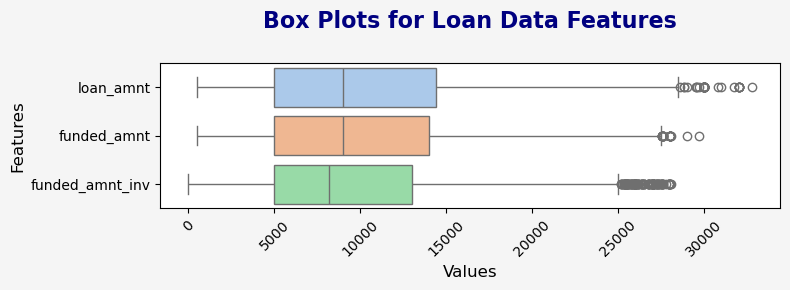

In [81]:
# Create a box plot for each column
plt.figure(figsize=(8, 3), facecolor='whitesmoke')
sns.boxplot(data=loan[columns_of_interest], orient='h', palette='pastel')  # Using seaborn for better aesthetics
plt.title('Box Plots for Loan Data Features\n', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)  # Remove gridlines

plt.tight_layout()
plt.show()

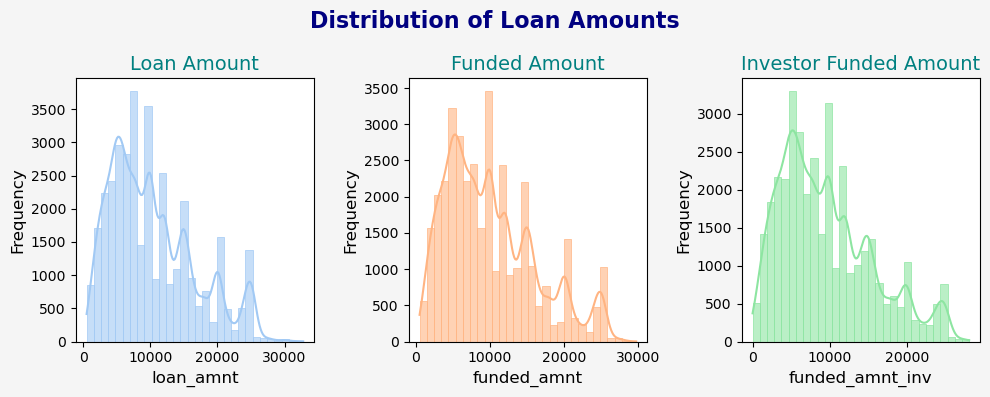

In [82]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Formatting Figure
fig.suptitle('Distribution of Loan Amounts', fontsize=16, fontweight='bold', color='navy')
fig.patch.set_facecolor('whitesmoke')  # Background color for the figure

# Customize colors
colors = sns.color_palette('pastel', n_colors=len(columns_of_interest))

# Customize titles
titles = ['Loan Amount', 'Funded Amount', 'Investor Funded Amount']

# Plot histograms for each column
for ax, col, title, color in zip(axes.flatten(), columns_of_interest, titles, colors):
    sns.histplot(data=loan, x=col, bins=30, kde=True, color=color, edgecolor=color, ax=ax, alpha=0.6)
    ax.set_title(title, fontsize=14, color='Teal')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(False)  # Turn off gridlines
    
    # Darken KDE line color
    kde_color = sns.dark_palette(color, n_colors=1, reverse=True)[0]  # Get the darkest shade from the palette
    for artist in ax.lines:
        artist.set_color(kde_color)

plt.tight_layout()
plt.show()

> Upon examining the density distributions of all three features, it is evident that they exhibit strikingly **similar patterns**. Therefore, we can confidently proceed with analyzing any of these features. 

> Each feature has a specific description that outlines its role and importance within the dataset. Despite the similarity in distributions, 'loan_amnt' stands out because it is a Pre-Approval Attribute unlike the others. Hence, we have opted to advance our analysis using **'loan_amnt'**.

#### _<a id = 'step23'><font color = 'RebeccaPurple'>Function Definition for Visualization of Numerical Variables</font></a>_ [▲](#top1)

In [83]:
def plot_hist_and_box(data, column_of_interest, titles, labelx, fill_color, h_bins=30):
    """
    Plots a histogram and a box plot for a specified column in the given DataFrame.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - column_of_interest: str, the name of the column to visualize
    - titles: list, the titles for the figure, histplot and boxplot
    - labelx: str, the label for x-axis
    - fill_color: tuple, the color from seaborn color palette to fill the plots
    - h_bins: int, no. of bins in the histogram (default: 30)
    """
    
    # Set up the figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Formatting Figure
    fig.suptitle(titles[0], fontsize=16, fontweight='bold', color='navy')
    fig.patch.set_facecolor('whitesmoke')  # Background color for the figure

    # Histogram of int_rate
    sns.histplot(data=data, x=column_of_interest, bins=h_bins, kde=True, color=fill_color, edgecolor=fill_color, ax=ax1, alpha=0.6)
    ax1.set_title(titles[1], fontsize=14, color='Teal')
    ax1.set_xlabel(labelx, fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.grid(False)  # Turn off gridlines

    # Box plot of int_rate
    sns.boxplot(data=data, x=column_of_interest, ax=ax2, color=fill_color)
    ax2.set_title(titles[2], fontsize=14, color='Teal')
    ax2.set_xlabel(labelx, fontsize=12)
    ax2.set_ylabel('Values', fontsize=12)
    ax2.grid(False)  # Turn off gridlines

    plt.tight_layout()
    plt.show()

#### _<a id = 'step24'><font color = 'RebeccaPurple'>Univariate Analysis of Interest Rates</font></a>_ [▲](#top1)

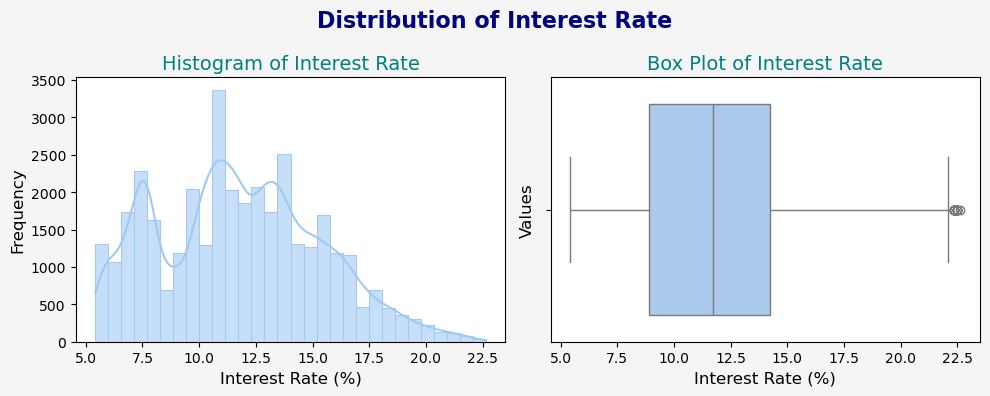

In [84]:
# Data Visualisation for 'int_rate'
column_of_interest = 'int_rate'
titles = ['Distribution of Interest Rate', 'Histogram of Interest Rate', 'Box Plot of Interest Rate']
labelx = 'Interest Rate (%)'

plot_hist_and_box(loan, column_of_interest, titles, labelx, colors[0])

#### _<a id = 'step25'><font color = 'RebeccaPurple'>Univariate Analysis of Annual Incomes</font></a>_ [▲](#top1)

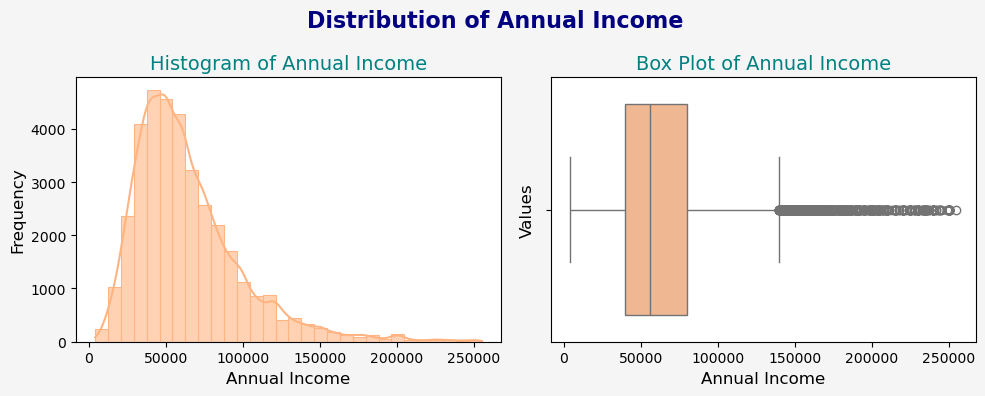

In [85]:
# Data Visualisation for 'annual_inc'
column_of_interest = 'annual_inc'
titles = ['Distribution of Annual Income', 'Histogram of Annual Income', 'Box Plot of Annual Income']
labelx = 'Annual Income'

plot_hist_and_box(loan, column_of_interest, titles, labelx, colors[1])

#### _<a id = 'step26'><font color = 'RebeccaPurple'>Univariate Analysis of Debt-to-Income Ratio (DTI)</font></a>_ [▲](#top1)

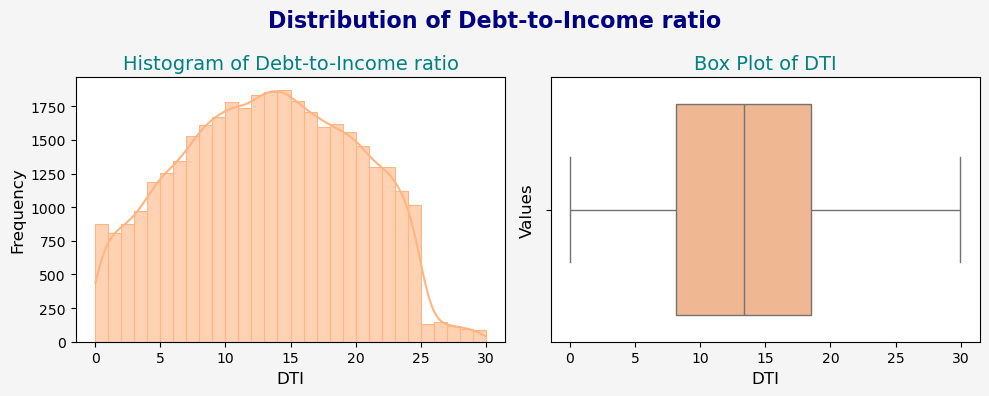

In [86]:
# Data Visualisation for 'dti'
column_of_interest = 'dti'
titles = ['Distribution of Debt-to-Income ratio', 'Histogram of Debt-to-Income ratio', 'Box Plot of DTI']
labelx = 'DTI'

plot_hist_and_box(loan, column_of_interest, titles, labelx, colors[1])

#### _<a id = 'step27'><font color = 'RebeccaPurple'>Univariate Analysis of Revolving Line Utilization Rate</font></a>_ [▲](#top1)

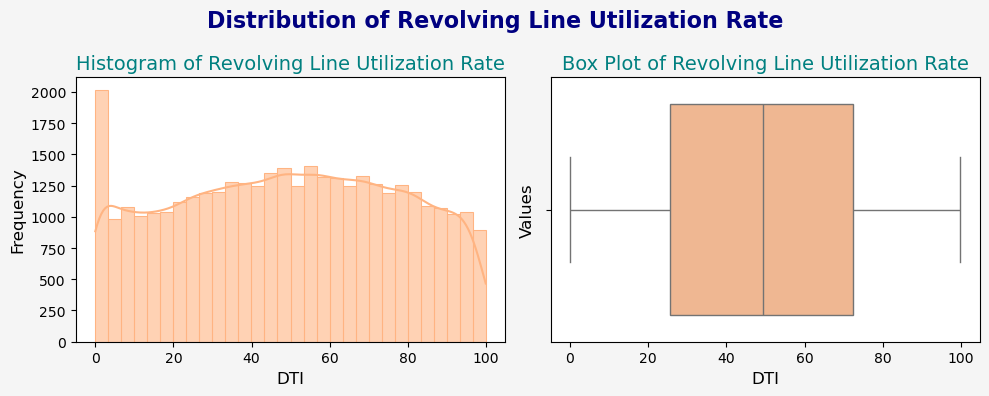

In [87]:
# Data Visualisation for 'revol_util'
column_of_interest = 'revol_util'
titles = ['Distribution of Revolving Line Utilization Rate', 'Histogram of Revolving Line Utilization Rate', 'Box Plot of Revolving Line Utilization Rate']
labelx = 'DTI'

plot_hist_and_box(loan, column_of_interest, titles, labelx, colors[1])

#### _<a id = 'step28'><font color = 'RebeccaPurple'>Univariate Analysis of Inquiries in past 6 months</font></a>_ [▲](#top1)

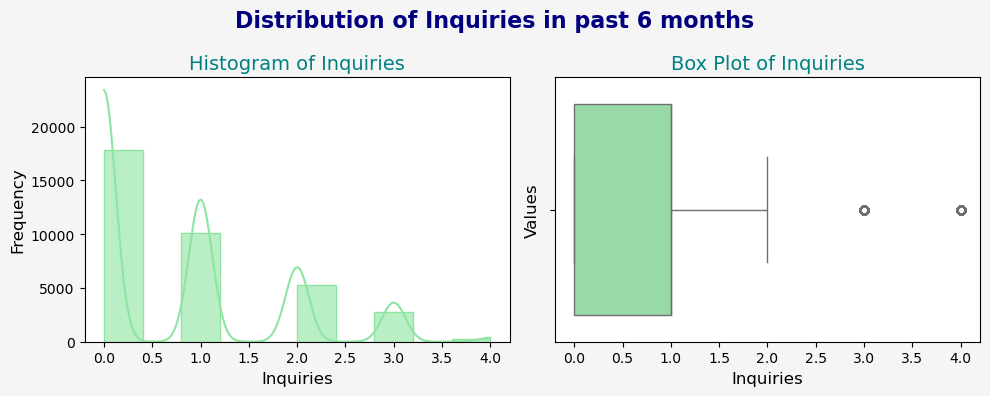

In [88]:
# Data Visualisation for 'inq_last_6mths'
column_of_interest = 'inq_last_6mths'
titles = ['Distribution of Inquiries in past 6 months', 'Histogram of Inquiries', 'Box Plot of Inquiries']
labelx = 'Inquiries'

plot_hist_and_box(loan, column_of_interest, titles, labelx, colors[2], 10)

#### _<a id = 'step29'><font color = 'RebeccaPurple'>Univariate Analysis of Open Credit lines</font></a>_ [▲](#top1)

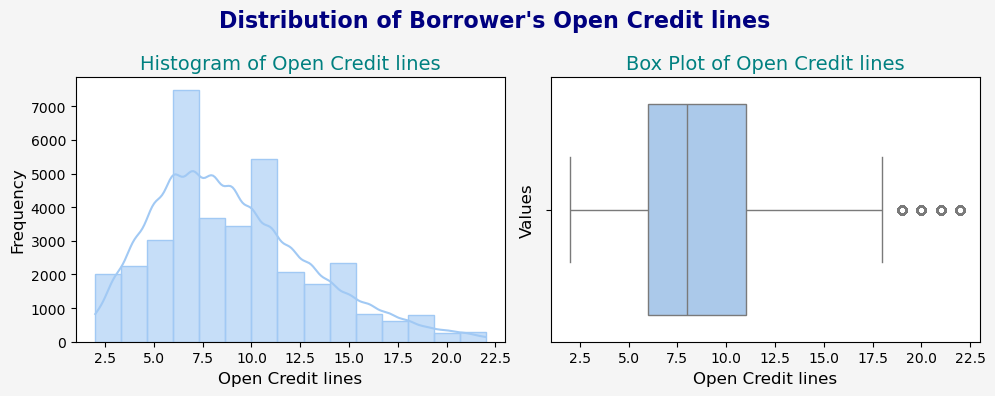

In [89]:
# Data Visualisation for 'open_acc'
column_of_interest = 'open_acc'
titles = ['Distribution of Borrower\'s Open Credit lines', 'Histogram of Open Credit lines', 'Box Plot of Open Credit lines']
labelx = 'Open Credit lines'

plot_hist_and_box(loan, column_of_interest, titles, labelx, colors[0], 15)

#### _<a id = 'step30'><font color = 'RebeccaPurple'>Univariate Analysis of Borrower's Total number of Credit lines</font></a>_ [▲](#top1)

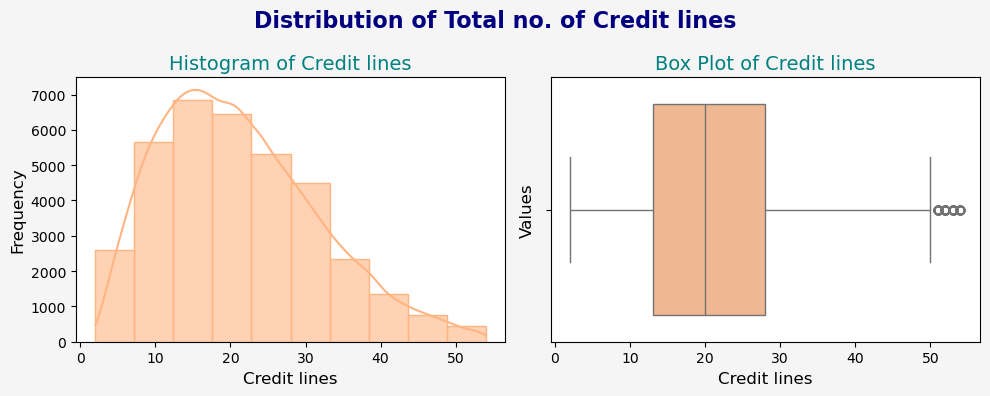

In [90]:
# Data Visualisation for 'total_acc'
column_of_interest = 'total_acc'
titles = ['Distribution of Total no. of Credit lines', 'Histogram of Credit lines', 'Box Plot of Credit lines']
labelx = 'Credit lines'

plot_hist_and_box(loan, column_of_interest, titles, labelx, colors[1], 10)

#### _<a id = 'step31'><font color = 'RebeccaPurple'>Univariate Analysis of Total Principal Amount received</font></a>_ [▲](#top1)

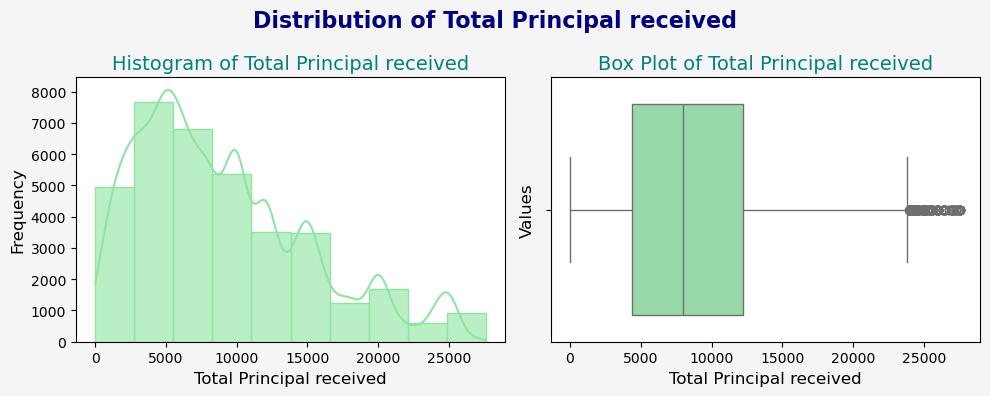

In [91]:
# Data Visualisation for 'total_rec_prncp'
column_of_interest = 'total_rec_prncp'
titles = ['Distribution of Total Principal received', 'Histogram of Total Principal received', 'Box Plot of Total Principal received']
labelx = 'Total Principal received'

plot_hist_and_box(loan, column_of_interest, titles, labelx, colors[2], 10)

### <a id = 'categorical-variables'>B. Categorical Variables</a>

> The Categorical Variables are: **'term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'region', 'income_category', 'emp_length'**

> Now that the outliers of annual_inc have been taken care of, let's derive income_category

In [92]:
def income_category(income):
    if income > 100000:
        return 'High'
    elif income > 50000:
        return 'Medium'
    else:
        return 'Low'

loan['income_category'] = loan['annual_inc'].apply(income_category)

loan[['annual_inc', 'income_category']].head()

,annual_inc,income_category
0,24000.0,Low
2,12252.0,Low
3,49200.0,Low
5,36000.0,Low
6,47004.0,Low


#### _<a id = 'step32'><font color = 'RebeccaPurple'>Function Definitions for Visualization of Categorical Variables</font></a>_ [▲](#top1)

In [105]:
# Formatter to reduce number of zeros on the y-axis
def thousands_formatter(x, pos):
    return '%1.0fK' % (x * 1e-3)

def plot_count_and_pie(data, column_of_interest, titles, start_angle, explode_list=None, sort_flag=False, color_palette='tab10'):
    """
    Plots count and percentage distributions of a specified column in the given DataFrame.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - column_of_interest: str, the name of the column to visualize
    - titles: list, the titles for the figure and the plots
    - start_angle: int, the starting angle for the pie chart
    - explode_list: list, the list of explode values for each wedge of the pie chart (default: None)
    - sort_flag: boolean, if True sort the labels otherwise don't (default: False)
    - color_palette: str, the name of the seaborn color palette to use for coloring plots (default: 'tab10')
    """
    
    # Setting up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Formatting Figure
    fig.suptitle(titles[0], fontsize=16, fontweight='bold', color='navy')
    fig.patch.set_facecolor('whitesmoke')  # Background color for the figure

    # Plot countplot
    if sort_flag:
        sns.countplot(data=data, x=column_of_interest, palette=color_palette, ax=axes[0], order=sorted(data[column_of_interest].unique()))  
    else:
        sns.countplot(data=data, x=column_of_interest, palette=color_palette, ax=axes[0])
    axes[0].set_title(f'{titles[1]} (Counts)' , fontsize=14, color='Teal')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].tick_params(axis='x')
    axes[0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # Plot pie chart
    if sort_flag:
        data_counts = data[column_of_interest].value_counts().sort_index()
    else:
        data_counts = data[column_of_interest].value_counts().reindex(data[column_of_interest].unique())
    data_percent = data_counts / data_counts.sum() * 100

    wedges, texts, autotexts = axes[1].pie(
        data_percent, 
        labels=data_percent.index, 
        autopct='%1.1f%%', 
        colors=sns.color_palette(color_palette, len(data_percent)), 
        startangle=start_angle, 
        explode=explode_list, 
        shadow=True,
        textprops={'fontsize': 14}
    )
    plt.setp(autotexts, color='white', weight="bold")
    
    axes[1].set_title(f'{titles[1]} (Percentages)', fontsize=14, color='Teal')

    fig.tight_layout()
    plt.show()

In [106]:
# Formatter to reduce number of zeros on the y-axis
def thousands_formatter(x, pos):
    return '%1.0fK' % (x * 1e-3)

def plot_count(data, column_of_interest, titles, xticks_labels=False, sort_flag=False, rotate_flag=False, color_palette='tab10'):
    """
    Plots count distribution of a specified column in the given DataFrame.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - column_of_interest: str, the name of the column to visualize
    - titles: list, the titles for the figure and the plot
    - xticks_labels: list, the labels for xticks of the count plot (default: False)
    - sort_flag: boolean, if True sort the labels otherwise don't (default: False)
    - rotate_flag: boolean, if True rotate the xticks label otherwise not (default: False)
    - color_palette: str, the name of the seaborn color palette to use for coloring plots (default: 'tab10')
    """
    
    # Setting up the subplots
    fig, axes = plt.subplots(figsize=(8, 6))

    # Formatting Figure
    fig.suptitle(titles[0], fontsize=16, fontweight='bold', color='navy')
    fig.patch.set_facecolor('whitesmoke')  # Background color for the figure

    # Plot countplot
    if sort_flag:
        sns.countplot(data=data, x=column_of_interest, palette=color_palette, ax=axes, order=sorted(data[column_of_interest].unique()))  
    else:
        sns.countplot(data=data, x=column_of_interest, palette=color_palette, ax=axes)
    
    axes.set_title(f'{titles[1]} (Counts)', fontsize=14, color='Teal')
    axes.set_xlabel('')
    axes.set_ylabel('Count', fontsize=12)
    axes.tick_params(axis='x')

    # Set custom xtick labels
    if xticks_labels:
        axes.set_xticklabels(xticks_labels)

    # Rotate xtick labels if rotate_flag is True
    if rotate_flag:
        plt.xticks(rotation=45, ha='right')

    axes.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    fig.tight_layout()
    plt.show()

#### _<a id = 'step33'><font color = 'RebeccaPurple'>Univariate Analysis of Loan Attribute: Term</font></a>_ [▲](#top1)

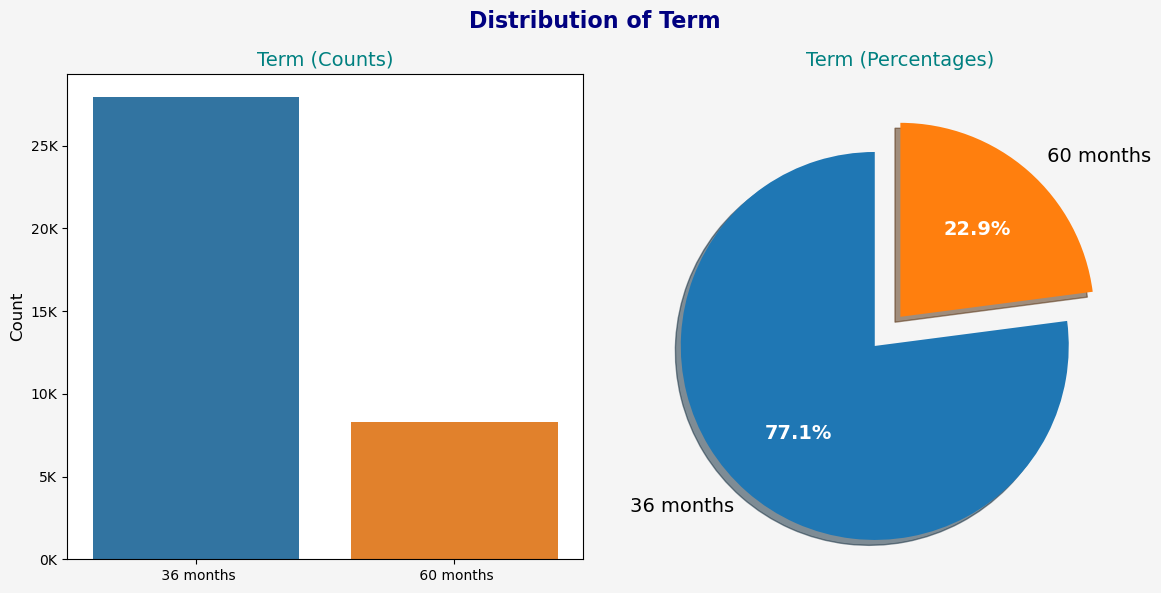

In [94]:
# Data Visualisation for 'term'
column_of_interest = 'term'
titles = ['Distribution of Term', 'Term']
start_angle = 90
explode_list = [0.2, 0]

plot_count_and_pie(loan, column_of_interest, titles, start_angle, explode_list, True)

#### _<a id = 'step34'><font color = 'RebeccaPurple'>Univariate Analysis of Loan Attribute: Loan Grade</font></a>_ [▲](#top1)

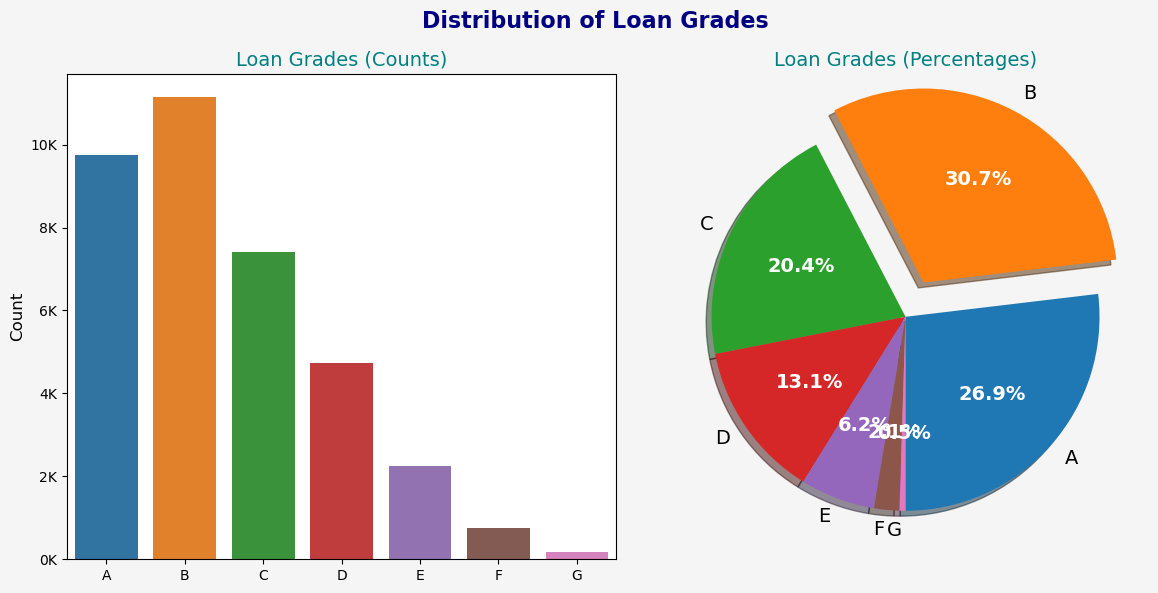

In [107]:
# Data Visualisation for 'grade'
column_of_interest = 'grade'
titles = ['Distribution of Loan Grades', 'Loan Grades']
start_angle = 270
explode_list = [0, 0.2, 0, 0, 0, 0, 0]

plot_count_and_pie(loan, column_of_interest, titles, start_angle, explode_list, True)

#### _<a id = 'step35'><font color = 'RebeccaPurple'>Univariate Analysis of Income Attribute: Income Category</font></a>_ [▲](#top1)

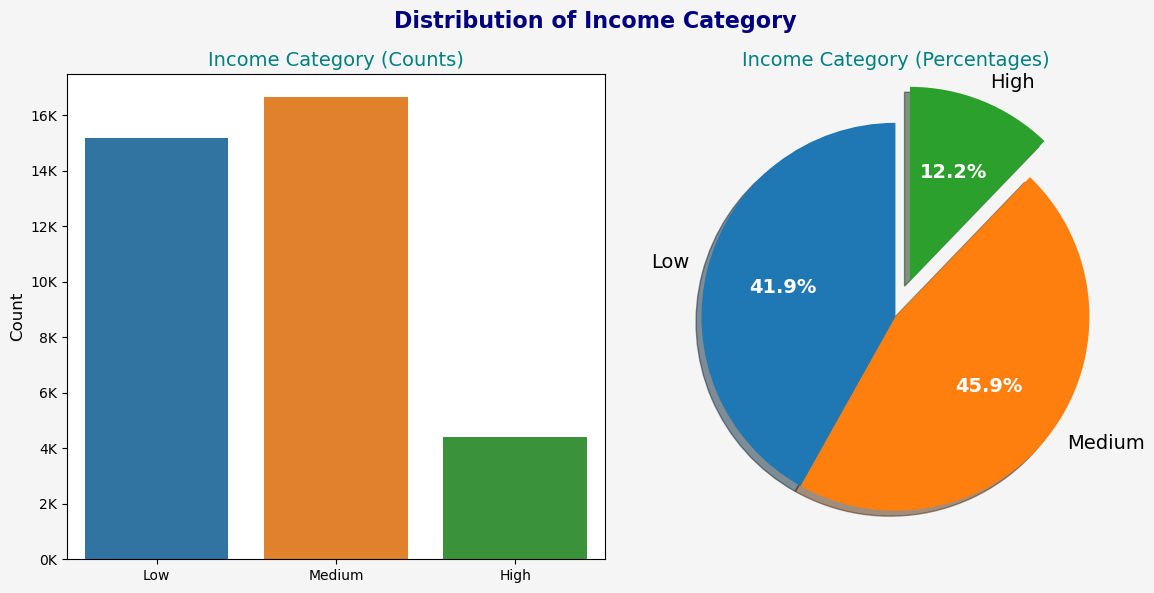

In [96]:
column_of_interest = 'income_category'
titles = ['Distribution of Income Category', 'Income Category']
start_angle = 90
explode_list = [0, 0, 0.2]

plot_count_and_pie(loan, column_of_interest, titles, start_angle, explode_list)

#### _<a id = 'step36'><font color = 'RebeccaPurple'>Univariate Analysis of Income Attribute: Verification Status</font></a>_ [▲](#top1)

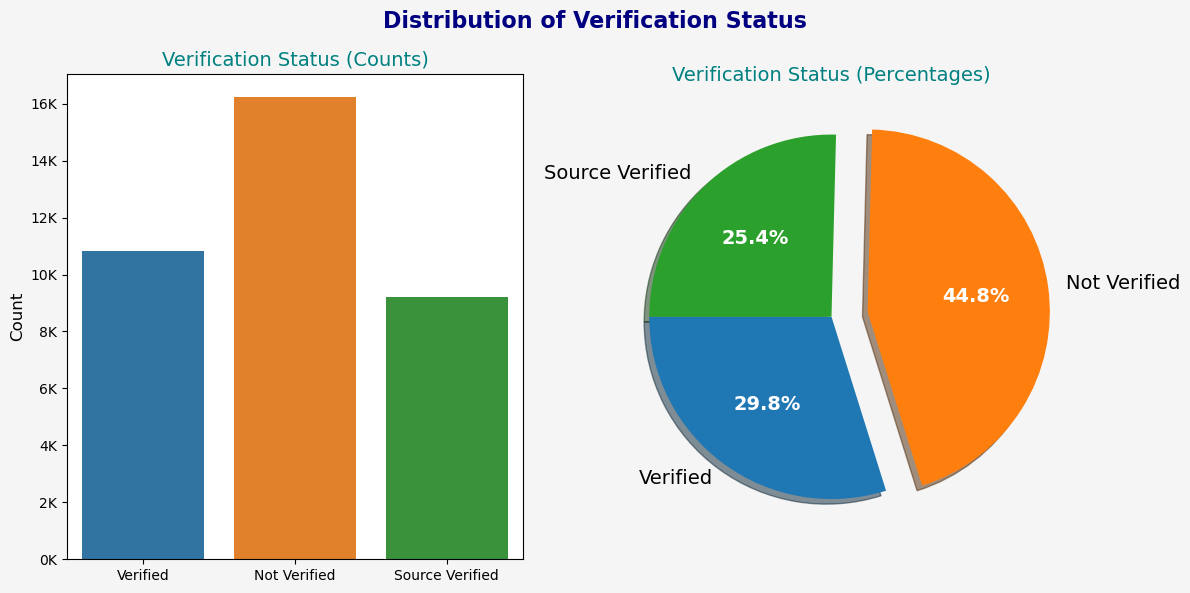

In [97]:
# Data Visualisation for 'verification_status'
column_of_interest = 'verification_status'
titles = ['Distribution of Verification Status', 'Verification Status']
start_angle = 180
explode_list = [0, 0.2, 0]

plot_count_and_pie(loan, column_of_interest, titles, start_angle, explode_list)

#### _<a id = 'step37'><font color = 'RebeccaPurple'>Univariate Analysis of Geographical Attributes: Home Ownership</font></a>_ [▲](#top1)

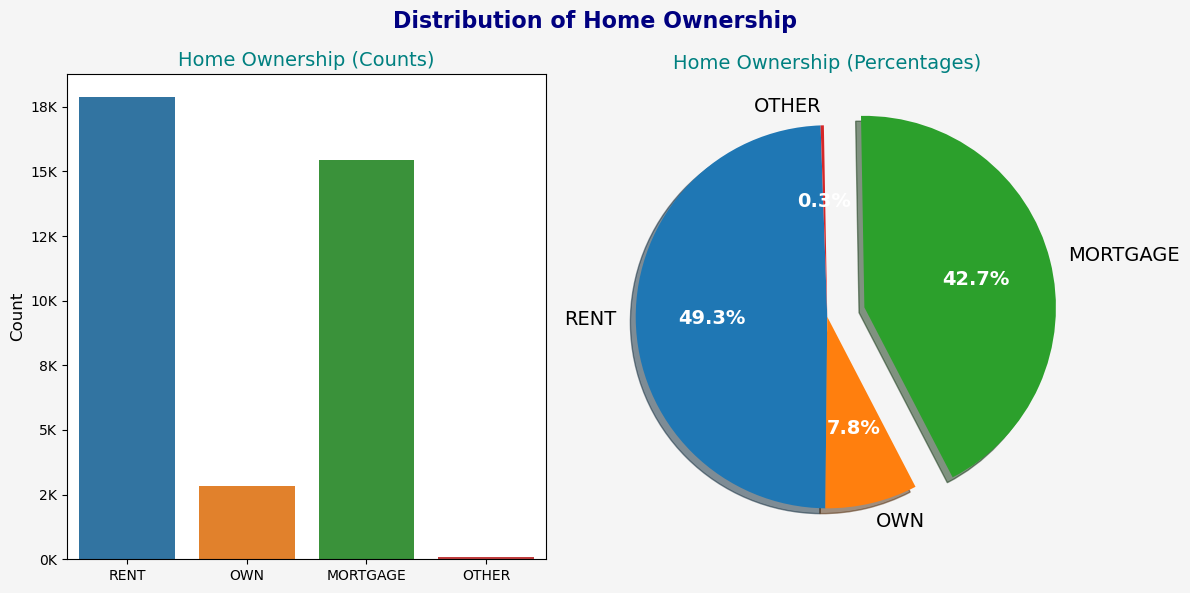

In [98]:
# Data Visualisation for 'home_ownership'
column_of_interest = 'home_ownership'
titles = ['Distribution of Home Ownership', 'Home Ownership']
start_angle = 92
explode_list = [0, 0, 0.2, 0]

plot_count_and_pie(loan, column_of_interest, titles, start_angle, explode_list)

#### _<a id = 'step38'><font color = 'RebeccaPurple'>Univariate Analysis of Geographical Attributes: Region</font></a>_ [▲](#top1)

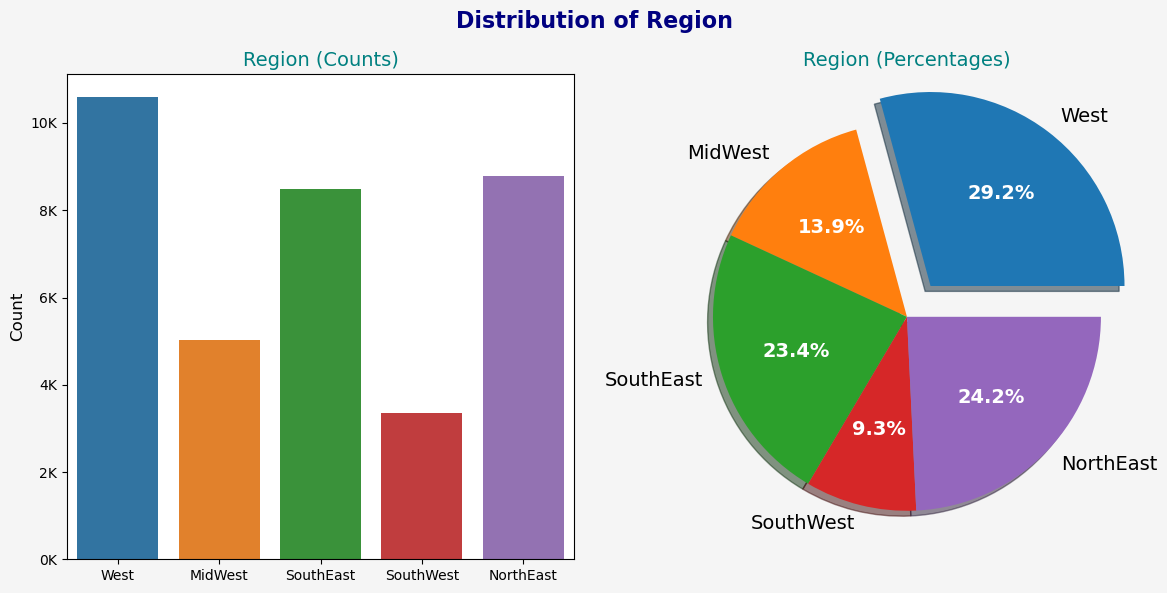

In [99]:
# Data Visualisation for 'region'
column_of_interest = 'region'
titles = ['Distribution of Region', 'Region']
start_angle = 0
explode_list = [0.2, 0, 0, 0, 0]

plot_count_and_pie(loan, column_of_interest, titles, start_angle, explode_list)

#### _<a id = 'step39'><font color = 'RebeccaPurple'>Univariate Analysis of Employment Length</font></a>_ [▲](#top1)

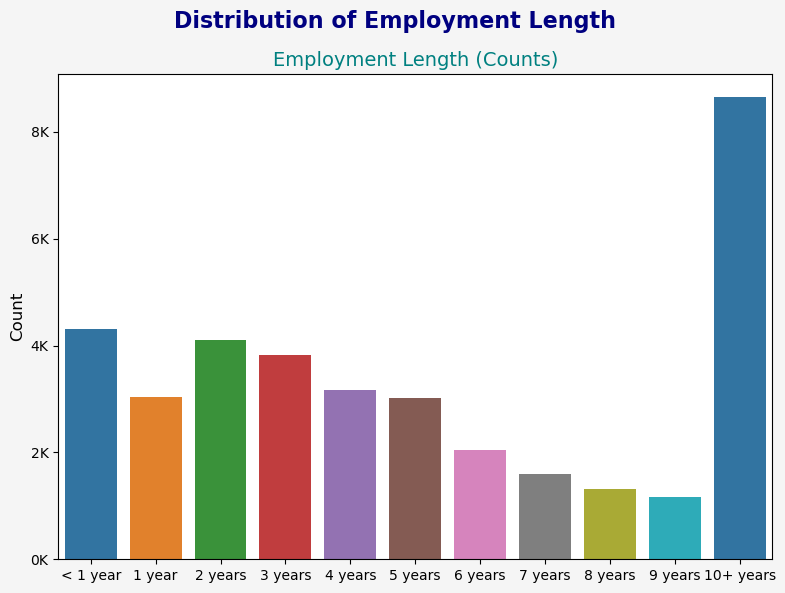

In [103]:
# Data Visualisation for 'emp_length'
column_of_interest = 'emp_length'
titles = ['Distribution of Employment Length', 'Employment Length']
xticks_labels = emp_length_labels

plot_count(loan, column_of_interest, titles, xticks_labels, sort_flag=True)

#### _<a id = 'step40'><font color = 'RebeccaPurple'>Univariate Analysis of Loan Purposes</font></a>_ [▲](#top1)

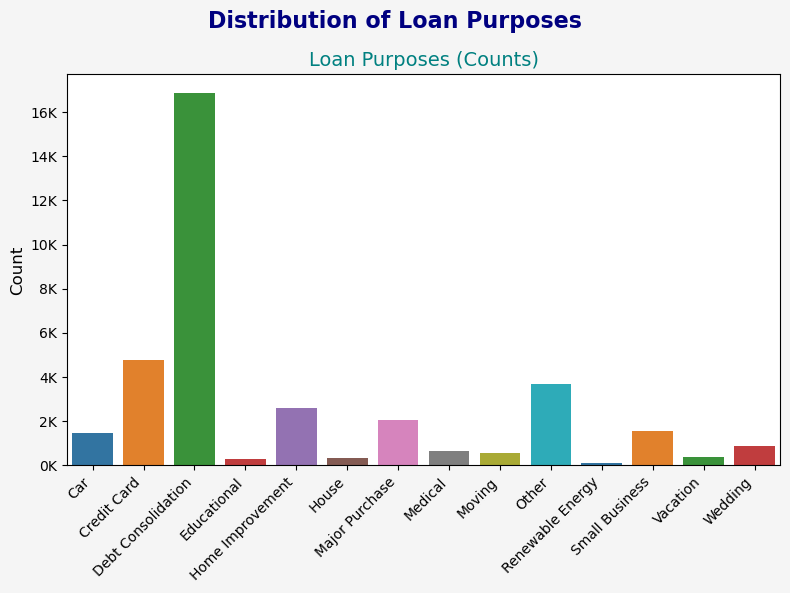

In [104]:
# Data Visualisation for 'purpose'
column_of_interest = 'purpose'
titles = ['Distribution of Loan Purposes', 'Loan Purposes']
xticks_labels = [label.replace('_', ' ').title() for label in sorted(loan['purpose'].unique())]

plot_count(loan, column_of_interest, titles, xticks_labels, sort_flag=True, rotate_flag=True)